STEP 1: IMPORT LIBRARIES 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os  

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

sns.set_style("whitegrid")  # Nice plot style


STEP 2: LOAD DATASET

In [20]:
import os  # Make sure os is imported

# Full path of dataset
file_path = r"C:\Users\User\Downloads\TASK 2\loan_prediction.csv"

# Check if file exists
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!\n")
    
    # look at the data
    print("First 5 rows:\n", df.head())
    print("\nDataset shape:", df.shape)
    print("\nDataset info:\n")
    print(df.info())
    print("\nMissing values:\n", df.isnull().sum())
else:
    print(f" File not found at '{file_path}'!")


Dataset loaded successfully!

First 5 rows:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0    

 STEP 3: HANDLE MISSING VALUES 

In [28]:
# Fill numerical columns with mean
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())  

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  

print("\n Missing values handled:\n", df.isnull().sum())



 Missing values handled:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


STEP 4: EXPLORATORY DATA ANALYSIS (EDA)

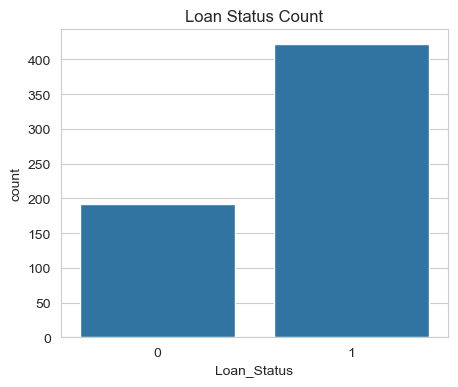

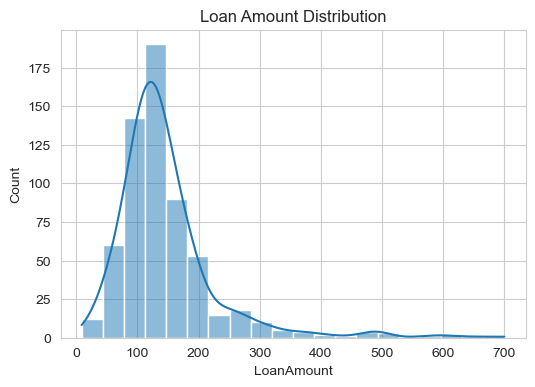

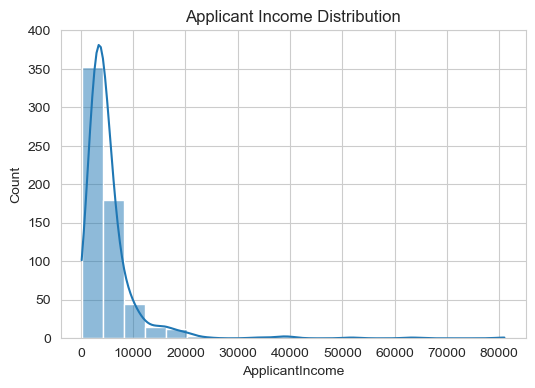

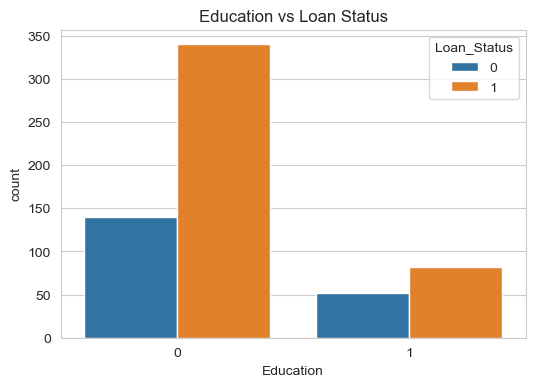

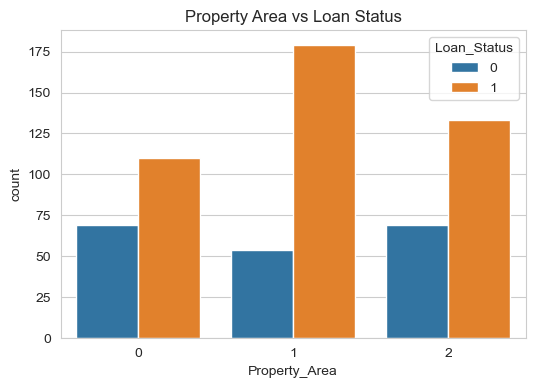

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# 1️ Loan Status Count
plt.figure(figsize=(5,4))
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status Count")
plt.show()

# 2️ Loan Amount Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['LoanAmount'], bins=20, kde=True)
plt.title("Loan Amount Distribution")
plt.show()

# 3️ Applicant Income Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['ApplicantIncome'], bins=20, kde=True)
plt.title("Applicant Income Distribution")
plt.show()

# 4️ Education vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Education vs Loan Status")
plt.show()

# 5️ Property Area vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title("Property Area vs Loan Status")
plt.show()


STEP 5: FEATURE ENCODING

In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols)

# Apply label encoding
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Check encoded data
df.head()


Categorical columns: Index([], dtype='object')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


STEP 6: SPLIT DATA & TRAIN MODEL

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling (imp)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

print("Model trained successfully without convergence warning!")

Model trained successfully without convergence warning!


STEP 7: MODEL EVALUATION

Model Accuracy: 78.86 %


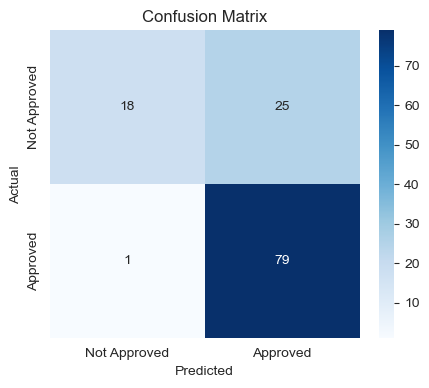

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Approved', 'Approved'],
    yticklabels=['Not Approved', 'Approved']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


STEP 8: CONCLUSION

In this task, I worked on a Credit Risk Prediction project to understand whether a loan application will be approved or not. First, I loaded the dataset and checked it carefully. Some values were missing, so I handled them properly to make the data clean and ready for use.

After that, I explored the data using simple graphs. This helped me understand how factors like applicant income, loan amount, education, and property area affect loan approval. Then, I converted the categorical data into numbers so that the machine learning model could understand it.

I used Logistic Regression to train the model because this problem has only two outcomes: approved or not approved. After training and testing the model, it gave good accuracy. I also used a confusion matrix to see how many predictions were correct and incorrect.

Overall, this task helped me understand the full process of building a machine learning model, from data cleaning to evaluation. It was a good learning experience and improved my understanding of credit risk analysis.